In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df = pd.read_pickle('../data/prepared_dataset.pickle')

In [56]:
df.dtypes

SEQN       float64
MCQ170K    float64
Sex         object
MCQ035     float64
SPXRAW      object
Age        float64
dtype: object

Тип данных в столбце с сырыми данными спирометрии на самом деле - байты:

In [57]:
df.SPXRAW

0        b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
1        b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2        b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
3        b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
4        b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
                               ...                        
28362    b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
28363    b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
28364    b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
28365    b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
28366    b'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
Name: SPXRAW, Length: 28367, dtype: object

In [58]:
df['spx_prepared'] = df['SPXRAW'].apply(lambda x: list(x))

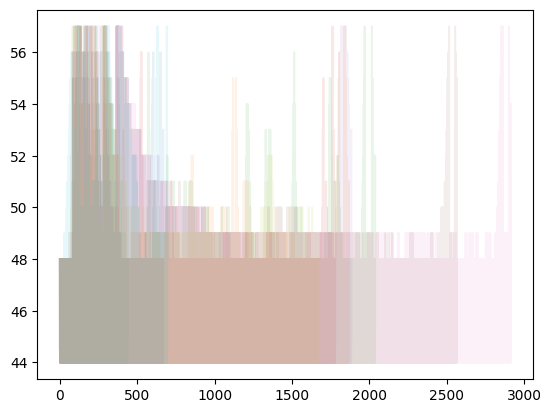

In [59]:
for row in df.spx_prepared.iloc[0:10]:
    plt.plot(row, alpha=0.1)

Видно, что сырые данные очень шумные:

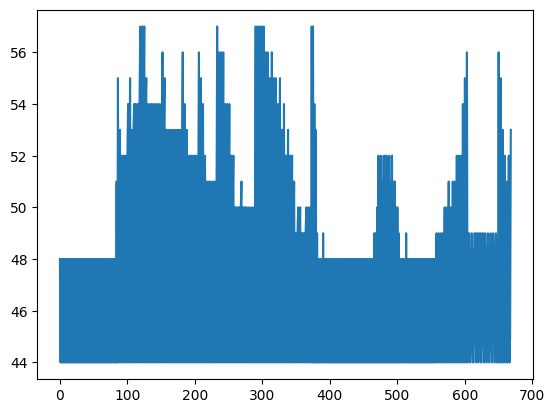

In [60]:
sample = df.spx_prepared.iloc[0]

plt.plot(sample)

Скользящее окно:

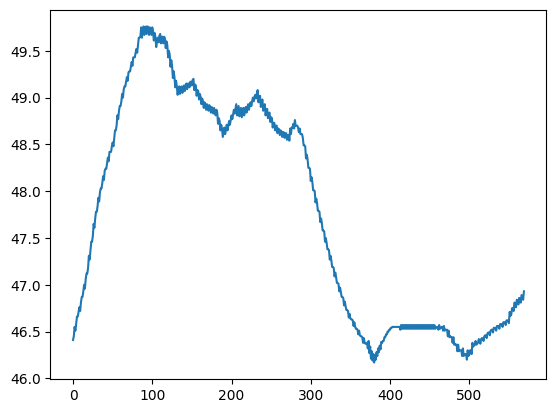

In [61]:
sample_window = np.lib.stride_tricks.sliding_window_view(sample, 100).mean(axis=-1)

plt.plot(sample_window)

In [62]:
df = df.drop(index=np.argwhere((df['MCQ035'] == 9) | (df['MCQ170K'] == 9) | (df['MCQ035'].isna()) | (df['MCQ170K'].isna())).flatten())

df.shape

(450, 7)

In [63]:
lens = []

for s in df.spx_prepared:
    lens.append(len(s))

print(np.mean(lens), np.std(lens))

2286.8288888888887 732.7284714976005


(array([  7.,  11.,  23.,  20., 115., 136.,  62.,  38.,  22.,  16.]),
 array([  33. ,  449.7,  866.4, 1283.1, 1699.8, 2116.5, 2533.2, 2949.9,
        3366.6, 3783.3, 4200. ]),
 <BarContainer object of 10 artists>)

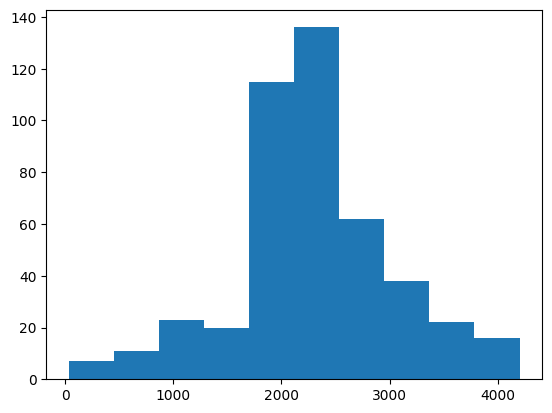

In [64]:
plt.hist(lens)

In [65]:
min(lens), max(lens)

(33, 4200)

In [66]:
df.columns

Index(['SEQN', 'MCQ170K', 'Sex', 'MCQ035', 'SPXRAW', 'Age', 'spx_prepared'], dtype='object')

In [67]:
df = df[['SEQN', 'MCQ170K', 'Sex', 'MCQ035', 'Age', 'spx_prepared']]

target_cols = ['MCQ170K', 'MCQ035']
feature_cols = ['SEQN', 'Sex', 'Age',]

In [68]:
max_len = max(lens)

max_len

4200

In [69]:
df.spx_prepared = df.spx_prepared.apply(lambda x: x + [0] * (max_len - len(x)))

(array([  0.,   0.,   0.,   0.,   0., 450.,   0.,   0.,   0.,   0.]),
 array([4199.5, 4199.6, 4199.7, 4199.8, 4199.9, 4200. , 4200.1, 4200.2,
        4200.3, 4200.4, 4200.5]),
 <BarContainer object of 10 artists>)

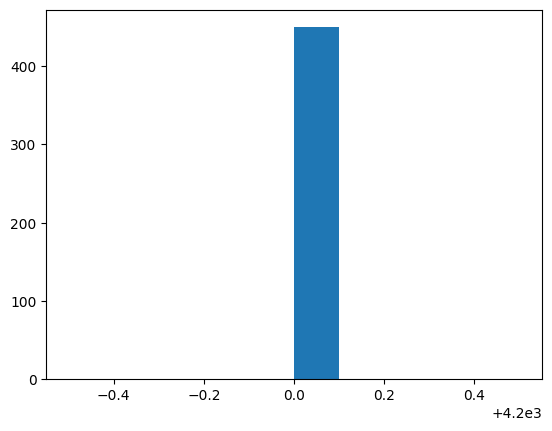

In [70]:
c = []

for l in df.spx_prepared:
    c.append(len(l))

plt.hist(c)

In [71]:
c[2], max_len

(4200, 4200)

In [72]:
min(c), max(c)

(4200, 4200)

In [73]:
df_preparing = df.copy(deep=True)

In [ ]:
for i in range(max(c)):
    df_preparing[f'timestamp_{i}'] = df.spx_prepared.apply(lambda x: x[i])

In [75]:
df_preparing.shape

(450, 4206)

In [76]:
df_preparing.columns.tolist()

['SEQN',
 'MCQ170K',
 'Sex',
 'MCQ035',
 'Age',
 'spx_prepared',
 'timestamp_0',
 'timestamp_1',
 'timestamp_2',
 'timestamp_3',
 'timestamp_4',
 'timestamp_5',
 'timestamp_6',
 'timestamp_7',
 'timestamp_8',
 'timestamp_9',
 'timestamp_10',
 'timestamp_11',
 'timestamp_12',
 'timestamp_13',
 'timestamp_14',
 'timestamp_15',
 'timestamp_16',
 'timestamp_17',
 'timestamp_18',
 'timestamp_19',
 'timestamp_20',
 'timestamp_21',
 'timestamp_22',
 'timestamp_23',
 'timestamp_24',
 'timestamp_25',
 'timestamp_26',
 'timestamp_27',
 'timestamp_28',
 'timestamp_29',
 'timestamp_30',
 'timestamp_31',
 'timestamp_32',
 'timestamp_33',
 'timestamp_34',
 'timestamp_35',
 'timestamp_36',
 'timestamp_37',
 'timestamp_38',
 'timestamp_39',
 'timestamp_40',
 'timestamp_41',
 'timestamp_42',
 'timestamp_43',
 'timestamp_44',
 'timestamp_45',
 'timestamp_46',
 'timestamp_47',
 'timestamp_48',
 'timestamp_49',
 'timestamp_50',
 'timestamp_51',
 'timestamp_52',
 'timestamp_53',
 'timestamp_54',
 'timestam

In [77]:
X_cols = ['Sex', 'Age'] + ['timestamp_'+str(x) for x in range(max(c))]
y_cols = ['MCQ035', 'MCQ170K'] 

In [79]:
df_preparing['target'] = ((df_preparing['MCQ035'] == 1) | (df_preparing['MCQ170K'] == 1)).astype(int)

/var/folders/3v/q720fzgx14z2lvb_gjps98_c0000gn/T/ipykernel_63849/2945042852.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_preparing['target'] = ((df_preparing['MCQ035'] == 1) | (df_preparing['MCQ170K'] == 1)).astype(int)


In [80]:
df_preparing.columns

Index(['SEQN', 'MCQ170K', 'Sex', 'MCQ035', 'Age', 'spx_prepared',
       'timestamp_0', 'timestamp_1', 'timestamp_2', 'timestamp_3',
       ...
       'timestamp_4191', 'timestamp_4192', 'timestamp_4193', 'timestamp_4194',
       'timestamp_4195', 'timestamp_4196', 'timestamp_4197', 'timestamp_4198',
       'timestamp_4199', 'target'],
      dtype='object', length=4207)

In [84]:
df_to_save = df_preparing[['SEQN', 'target', 'Age', 'Sex'] + ["timestamp_"+str(i) for i in range(max(c))]]

In [85]:
set(df_preparing.columns.tolist()) - (set(df_to_save.columns.tolist()))

{'MCQ035', 'MCQ170K', 'spx_prepared'}

In [86]:
df_to_save.to_pickle('../data/clean_data.pickle')